# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_merge = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
study_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
study_merge['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_counts = study_merge.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name='counts')

# Filter out the combinations that appear more than once
duplicates = duplicate_counts[duplicate_counts['counts'] > 1]

print(duplicates)


    Mouse ID  Timepoint  counts
586     g989          0       2
587     g989          5       2
588     g989         10       2
589     g989         15       2
590     g989         20       2


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
study_merge.loc[study_merge['Mouse ID'] =='g989',:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_clean = study_merge[study_merge['Mouse ID'] != 'g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
study_clean['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Mean_Tumor_Volume = study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean().rename('Mean Tumor Volume')
Median_Tumor_Volume = study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median().rename('Median Tumor Volume')
Tumor_Volume_Variance = study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].var().rename('Tumor Volume Variance')
Tumor_Volume_StdDev = study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std().rename('Tumor Volume Std Dev')
Tumor_Volume_StdErr = study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem().rename('Tumor Volume SEM')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
study_drug = pd.concat([Mean_Tumor_Volume, Median_Tumor_Volume, Tumor_Volume_Variance, Tumor_Volume_StdDev, Tumor_Volume_StdErr], axis=1)
print(study_drug)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std Dev  Tumor Volume SE

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
study_clean_adv = study_clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Using the aggregation method, produce the same summary statistics in a single line
print(study_clean_adv)

                   mean     median        var       std       sem
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398


## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number of Rows for Each Drug Regimen')

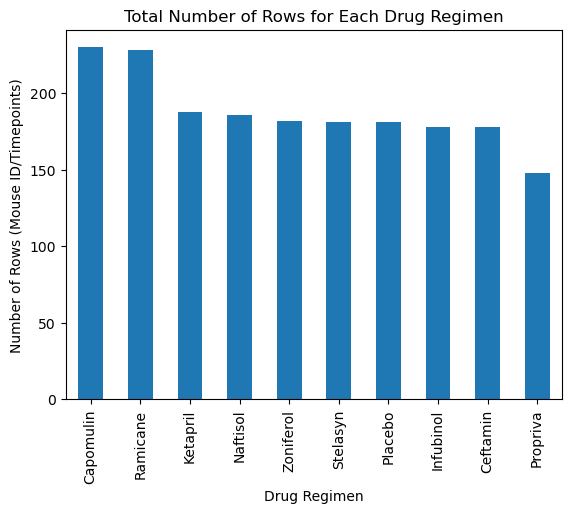

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Regimen_count = study_clean['Drug Regimen'].value_counts()

# Create a bar plot
Regimen_count.plot(kind='bar', rot=90)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows for Each Drug Regimen')


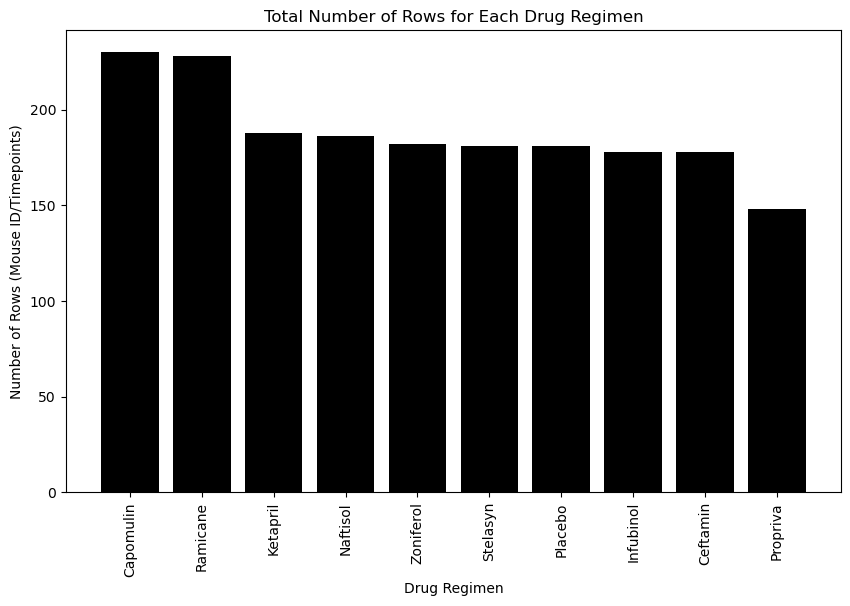

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Regimen_count = study_clean['Drug Regimen'].value_counts()

# Create a bar plot using pyplot
plt.figure(figsize=(10, 6))
plt.bar(Regimen_count.index, Regimen_count.values, color='k')
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoints)')
plt.title('Total Number of Rows for Each Drug Regimen')

# Show the plot
plt.show()

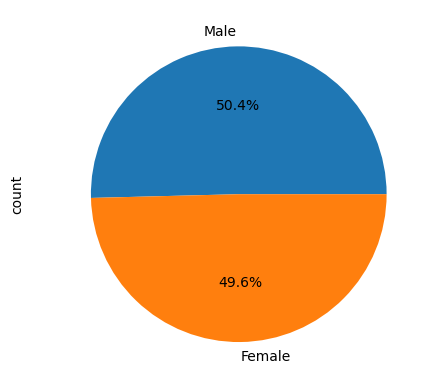

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
mouse_filtered = mouse_metadata[mouse_metadata['Mouse ID'] != 'g989']
sex_count = mouse_filtered['Sex'].value_counts()

# Get the unique mice with their gender
sex_count.head()

# Make the pie chart
sex_count.plot.pie(autopct='%1.1f%%', startangle= 0)
plt.ylabel('')
plt.text(-1.5, 0, 'count', rotation=90, va='center', ha='center')
plt.show()

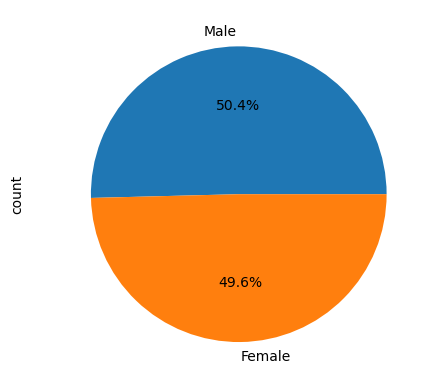

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
fig, ax = plt.subplots()
ax.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%', startangle=0)

# Make the pie chart
plt.text(-1.5, 0, 'count', rotation=90, va='center', ha='center')
ax.set_ylabel('')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = study_clean[study_clean['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = pd.merge(last_timepoints, study_clean, on=['Mouse ID', 'Timepoint'], how='left')
final_volumes = merged_data[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]
print(final_volumes)

   Mouse ID Drug Regimen  Timepoint  Tumor Volume (mm3)
0      a203    Infubinol         45           67.973419
1      a251    Infubinol         45           65.525743
2      a275     Ceftamin         45           62.999356
3      a411     Ramicane         45           38.407618
4      a444     Ramicane         45           43.047543
..      ...          ...        ...                 ...
95     y769     Ceftamin         45           68.594745
96     y793    Capomulin         45           31.896238
97     y865     Ceftamin         45           64.729837
98     z578     Ramicane         45           30.638696
99     z581    Infubinol         45           62.754451

[100 rows x 4 columns]


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] - carried over from previous


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_final = {treatment: [] for treatment in treatment_regimens}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_regimens:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_volumes[final_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # add subset
    tumor_volume_final[treatment] = treatment_data
    
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    print(f"{treatment} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [15]:
final_volumes.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
2,a275,Ceftamin,45,62.999356
3,a411,Ramicane,45,38.407618
4,a444,Ramicane,45,43.047543


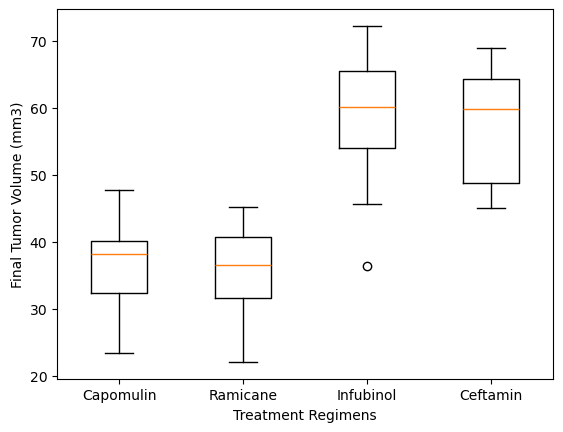

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot([tumor_volume_final[treatment] for treatment in treatment_regimens], labels=treatment_regimens)

ax.set_xlabel('Treatment Regimens')
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

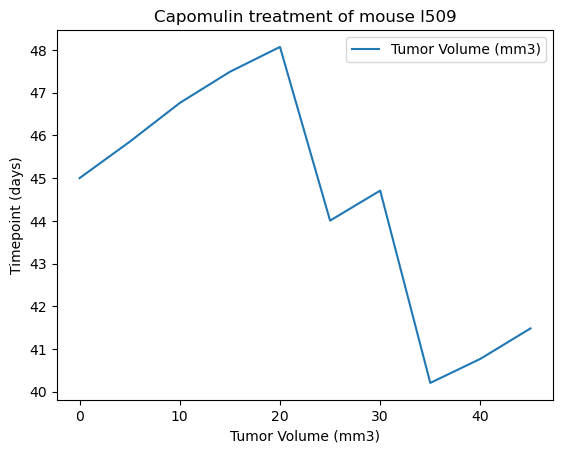

In [25]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse = study_clean[study_clean['Mouse ID'] == 'l509']

single_mouse.plot(x='Timepoint',y='Tumor Volume (mm3)', kind='line')

plt.ylabel('Timepoint (days)')
plt.xlabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

In [26]:
single_mouse.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21


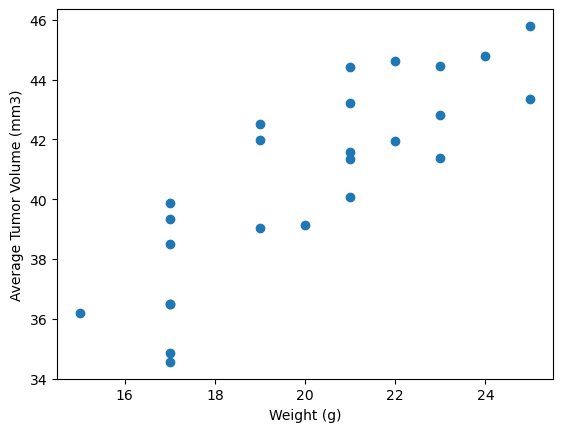

In [33]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
single_treatment = study_clean[study_clean['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = single_treatment.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()
merged_average = pd.merge(avg_tumor_volume, single_treatment[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

plt.scatter(merged_average['Weight (g)'], merged_average['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


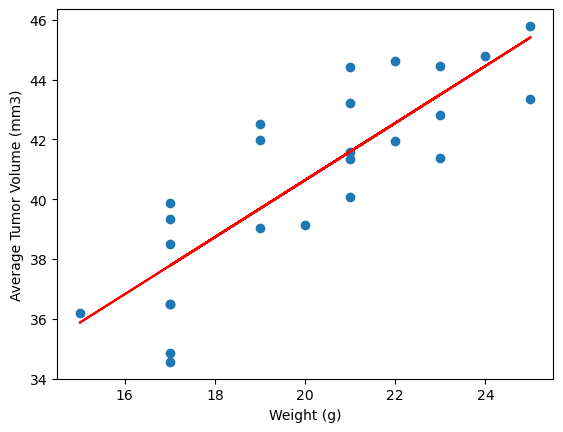

In [38]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_coef = merged_average['Weight (g)'].corr(merged_average['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is {round(corr_coef,2)}')

slope, intercept, r_value, p_value, std_err = st.linregress(merged_average['Weight (g)'], merged_average['Tumor Volume (mm3)'])
plt.scatter(merged_average['Weight (g)'], merged_average['Tumor Volume (mm3)'])
plt.plot(merged_average['Weight (g)'], intercept + slope * merged_average['Weight (g)'], color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()